In [1]:
# configure plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable #for subplot colorbars
from matplotlib.pyplot import cm

%config InlineBackend.rc = {'figure.dpi': 300, 'savefig.dpi': 300, \
                            'figure.figsize': (6, 6 / 1.6), 'font.size': 8, \
                            'figure.facecolor': (1, 1, 1, 0),'font.sans-serif':'Latin Modern Math'}

from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

%matplotlib inline

#dark plotting
plt.style.use('dark_background')

In [2]:
import os
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from skimage import color
from PIL import Image

# Reading image

In [3]:
## drop working directory with location of downloaded images here
os.chdir('/Volumes/Extreme Pro/Projects/Vibrometer/Data/')

im = Image.open("overhead.png")  
im = np.asarray(im)

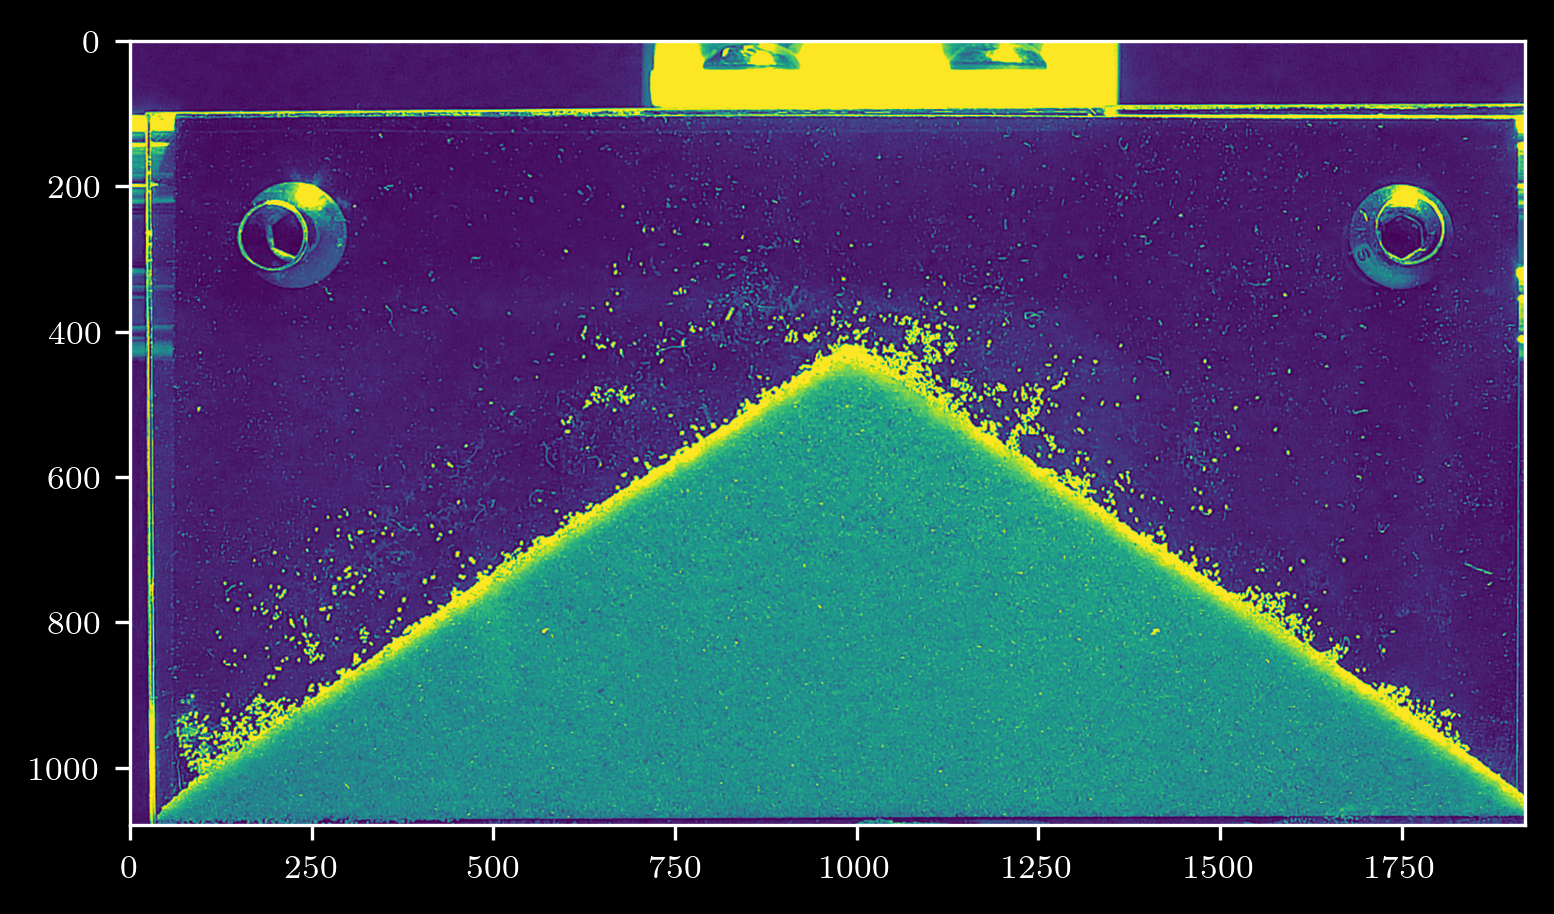

In [4]:
plt.imshow(im[:,:,2])

# Crop

In [5]:
image = im[:,:,0]

In [6]:
y_min = 400
y_max = np.max(image.shape[0]) - 10
x_min = 70
x_max = np.max(image.shape[1])

cropped_image = image[y_min:y_max, x_min:x_max]

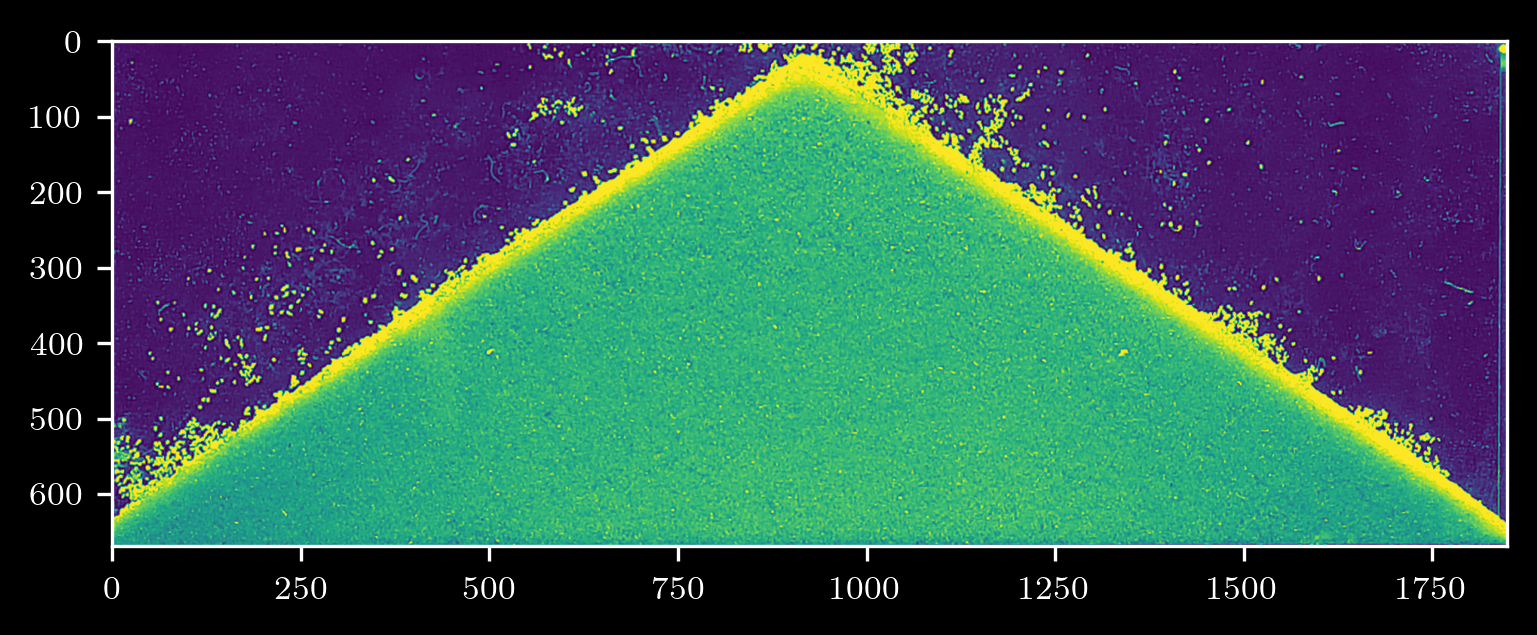

In [7]:
plt.imshow(cropped_image)

# Blurring

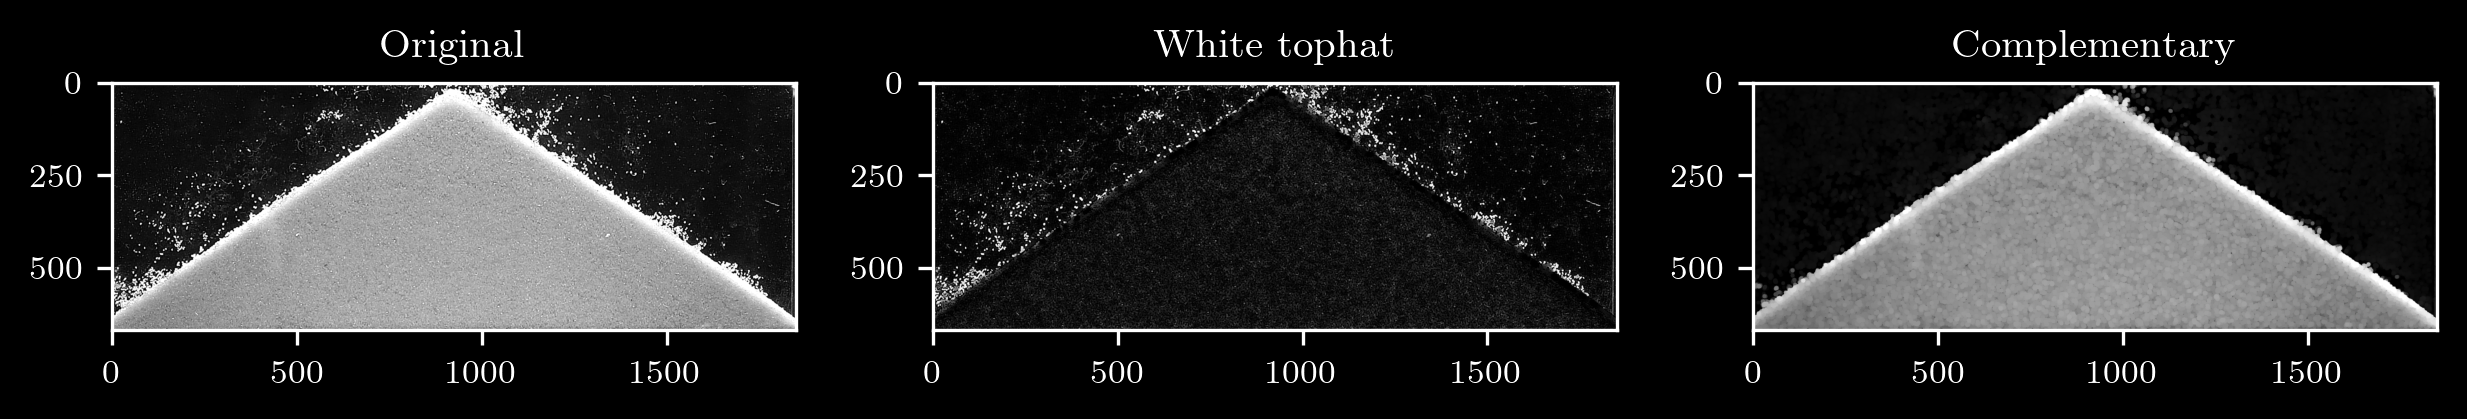

<Figure size 1800x1125 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt

from skimage import data
from skimage import color, morphology

image = cropped_image

footprint = morphology.disk(5)
res = morphology.white_tophat(image, footprint)

fig, ax = plt.subplots(ncols=3, figsize=(10, 3))
ax[0].set_title('Original')
ax[0].imshow(image, cmap='gray')
ax[1].set_title('White tophat')
ax[1].imshow(res, cmap='gray')
ax[2].set_title('Complementary')
ax[2].imshow(image - res, cmap='gray')

plt.show()

plt.savefig("/Volumes/Extreme Pro/Projects/Vibrometer/Figures/sandpile" + ".jpg",format="JPG",bbox_inches='tight')

# Thresholding

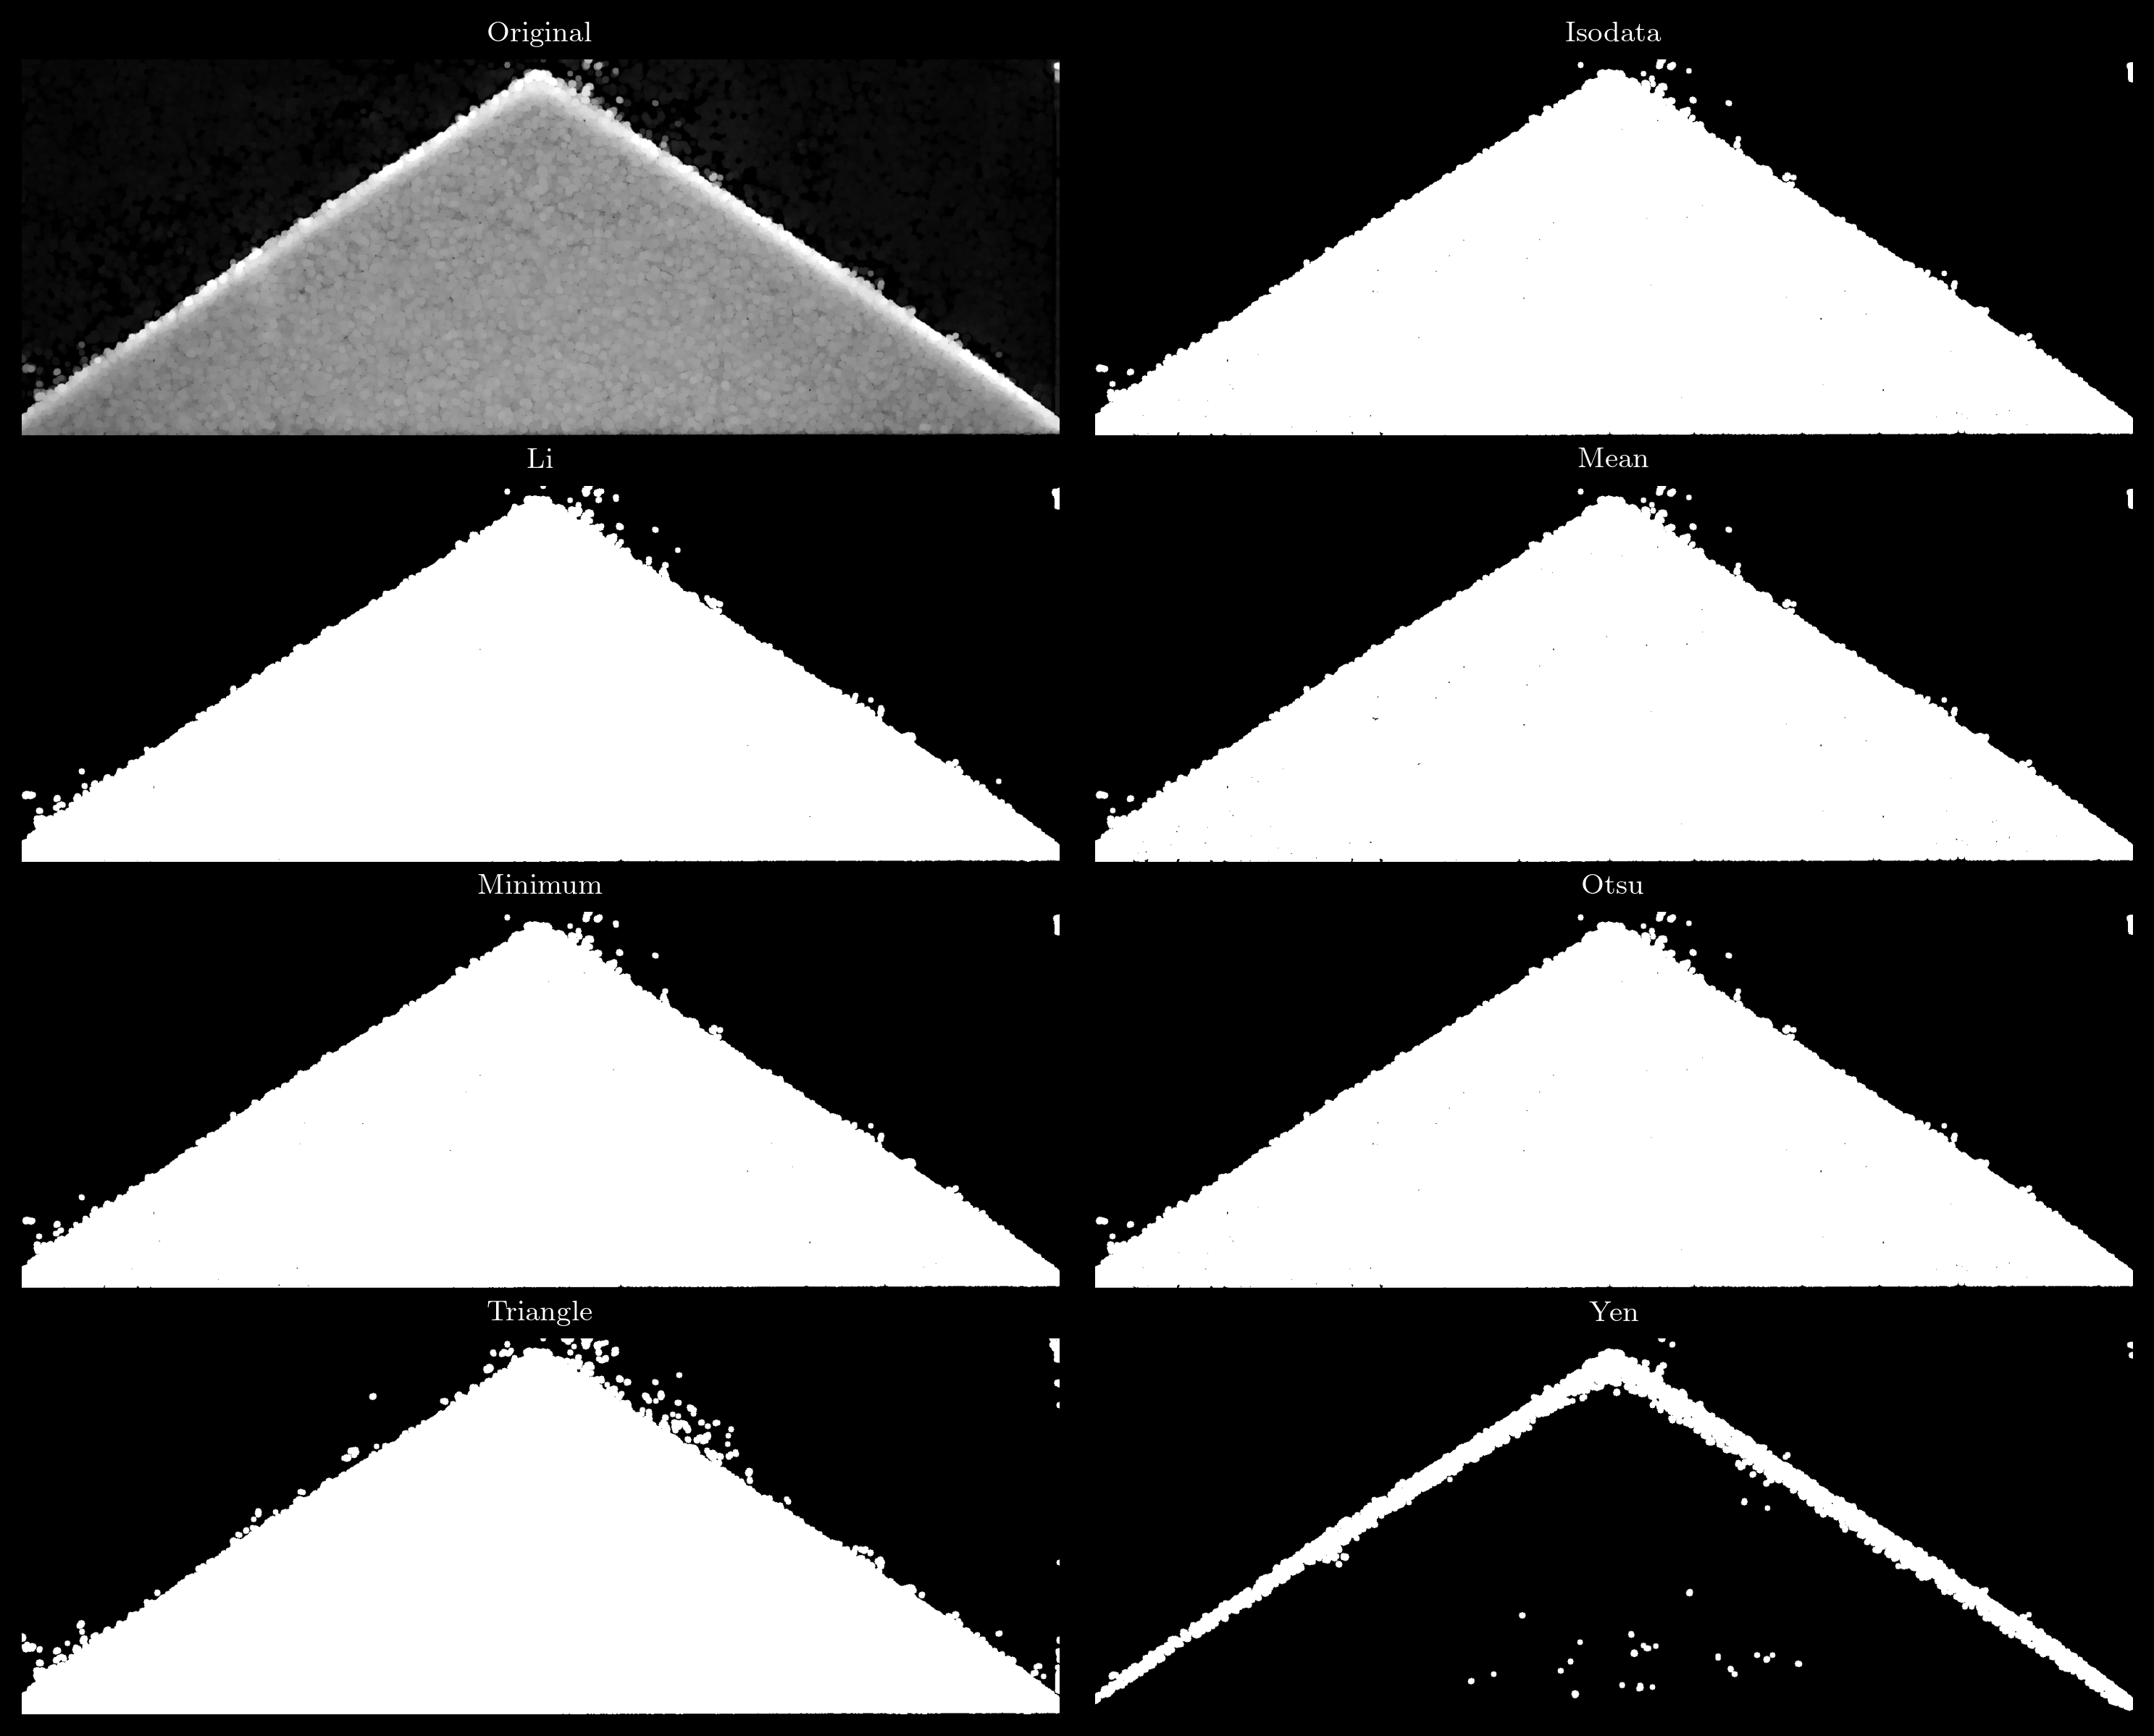

In [9]:
from skimage.filters import try_all_threshold

image = image - res

fig, ax = try_all_threshold(image, figsize=(10, 8), verbose=False)
plt.show()

## Selecting a threshold

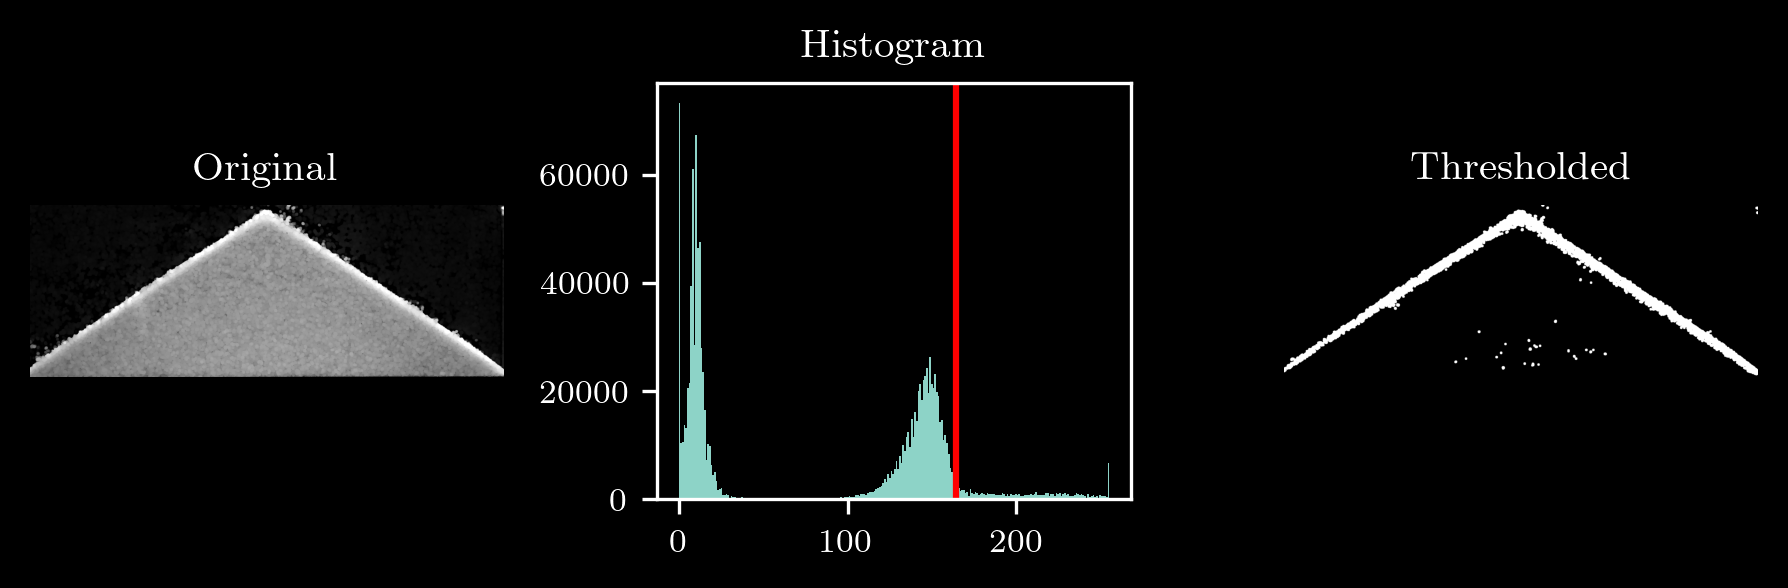

In [37]:
from skimage.filters import threshold_yen

thresh = threshold_yen(image)
binary = image > thresh
mask = ~binary

fig = plt.figure(figsize=(6, 2))

ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)


ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original')
ax1.axis('off')

ax2.hist(image.ravel(), bins=256)
ax2.set_title('Histogram')
ax2.axvline(thresh, color='r')

ax3.imshow(binary, cmap=plt.cm.gray)
ax3.set_title('Thresholded')
ax3.axis('off')

fig.tight_layout()

# plt.savefig("/Volumes/Extreme Pro/Projects/Vibrometer/Figures/sandpile_threshold" + ".jpg",format="JPG",bbox_inches='tight')

# recursively filling holes to create a cleaner mask

Some grains cling to the sidewalls and this makes threholding tricky. Here I am "filling the holes" such that these grainsa re removed

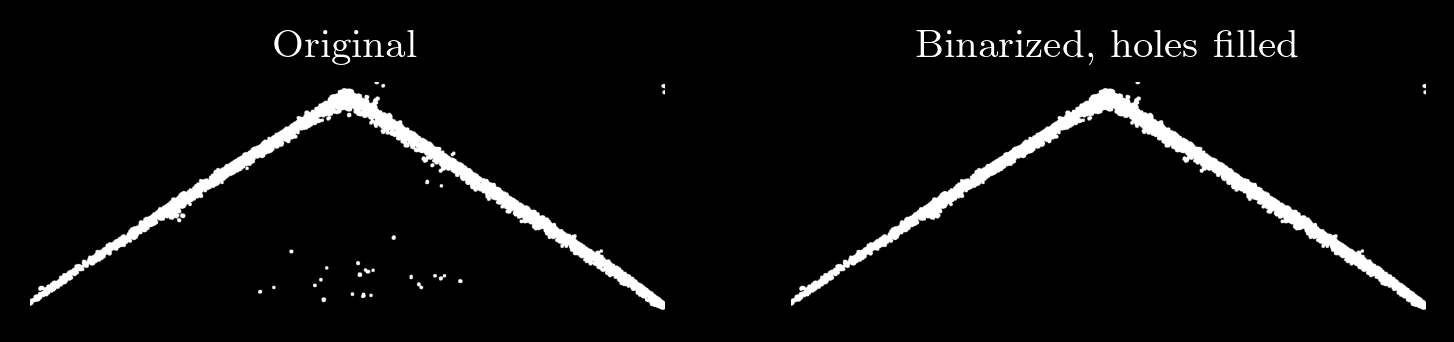

In [11]:
from scipy import ndimage as ndi

#recursively filling holes to create a cleaner mask

fill_a = ndi.binary_fill_holes(binary)
fill_b = ndi.binary_fill_holes(~fill_a)
fill_c = ndi.binary_fill_holes(fill_b)

cmap = 'gray_r'

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.imshow(~binary, cmap=cmap)
ax1.set_title('Original')
ax1.axis('off')

ax2.imshow(fill_c, cmap=cmap)
ax2.set_title('Binarized, holes filled')
ax2.axis('off')

plt.savefig("/Volumes/Extreme Pro/Projects/Vibrometer/Figures/sandpile" + ".jpg",format="JPG",bbox_inches='tight')

In [12]:
mask_coordinates = np.where(~fill_c== True)
mask_coordinates = np.asarray(mask_coordinates)
mask_coordinates.shape

(2, 85740)

In [13]:
xy = zip(mask_coordinates[1],mask_coordinates[0])
xy = list(xy)
xy

[(1003, 0),
 (1004, 0),
 (1005, 0),
 (1006, 0),
 (1007, 0),
 (1008, 0),
 (1009, 0),
 (1010, 0),
 (1011, 0),
 (1012, 0),
 (1013, 0),
 (1014, 0),
 (1015, 0),
 (1016, 0),
 (1004, 1),
 (1005, 1),
 (1006, 1),
 (1007, 1),
 (1008, 1),
 (1009, 1),
 (1010, 1),
 (1011, 1),
 (1012, 1),
 (1013, 1),
 (1014, 1),
 (1015, 1),
 (1016, 1),
 (1004, 2),
 (1005, 2),
 (1006, 2),
 (1007, 2),
 (1008, 2),
 (1009, 2),
 (1010, 2),
 (1011, 2),
 (1012, 2),
 (1013, 2),
 (1014, 2),
 (1015, 2),
 (1004, 3),
 (1005, 3),
 (1006, 3),
 (1007, 3),
 (1008, 3),
 (1009, 3),
 (1010, 3),
 (1011, 3),
 (1012, 3),
 (1013, 3),
 (1014, 3),
 (1015, 3),
 (1005, 4),
 (1006, 4),
 (1007, 4),
 (1008, 4),
 (1009, 4),
 (1010, 4),
 (1011, 4),
 (1012, 4),
 (1013, 4),
 (1014, 4),
 (1015, 4),
 (1006, 5),
 (1007, 5),
 (1008, 5),
 (1009, 5),
 (1010, 5),
 (1011, 5),
 (1012, 5),
 (1013, 5),
 (1014, 5),
 (1009, 6),
 (1010, 6),
 (1011, 6),
 (1844, 6),
 (1845, 6),
 (1846, 6),
 (1847, 6),
 (1848, 6),
 (1849, 6),
 (1841, 7),
 (1842, 7),
 (1843, 7),
 (18

In [14]:
xy_sorted = sorted(xy , key=lambda k: [k[0], k[1]])
#xy_sorted

In [15]:
x, y = zip(*xy_sorted)
n = len(x)

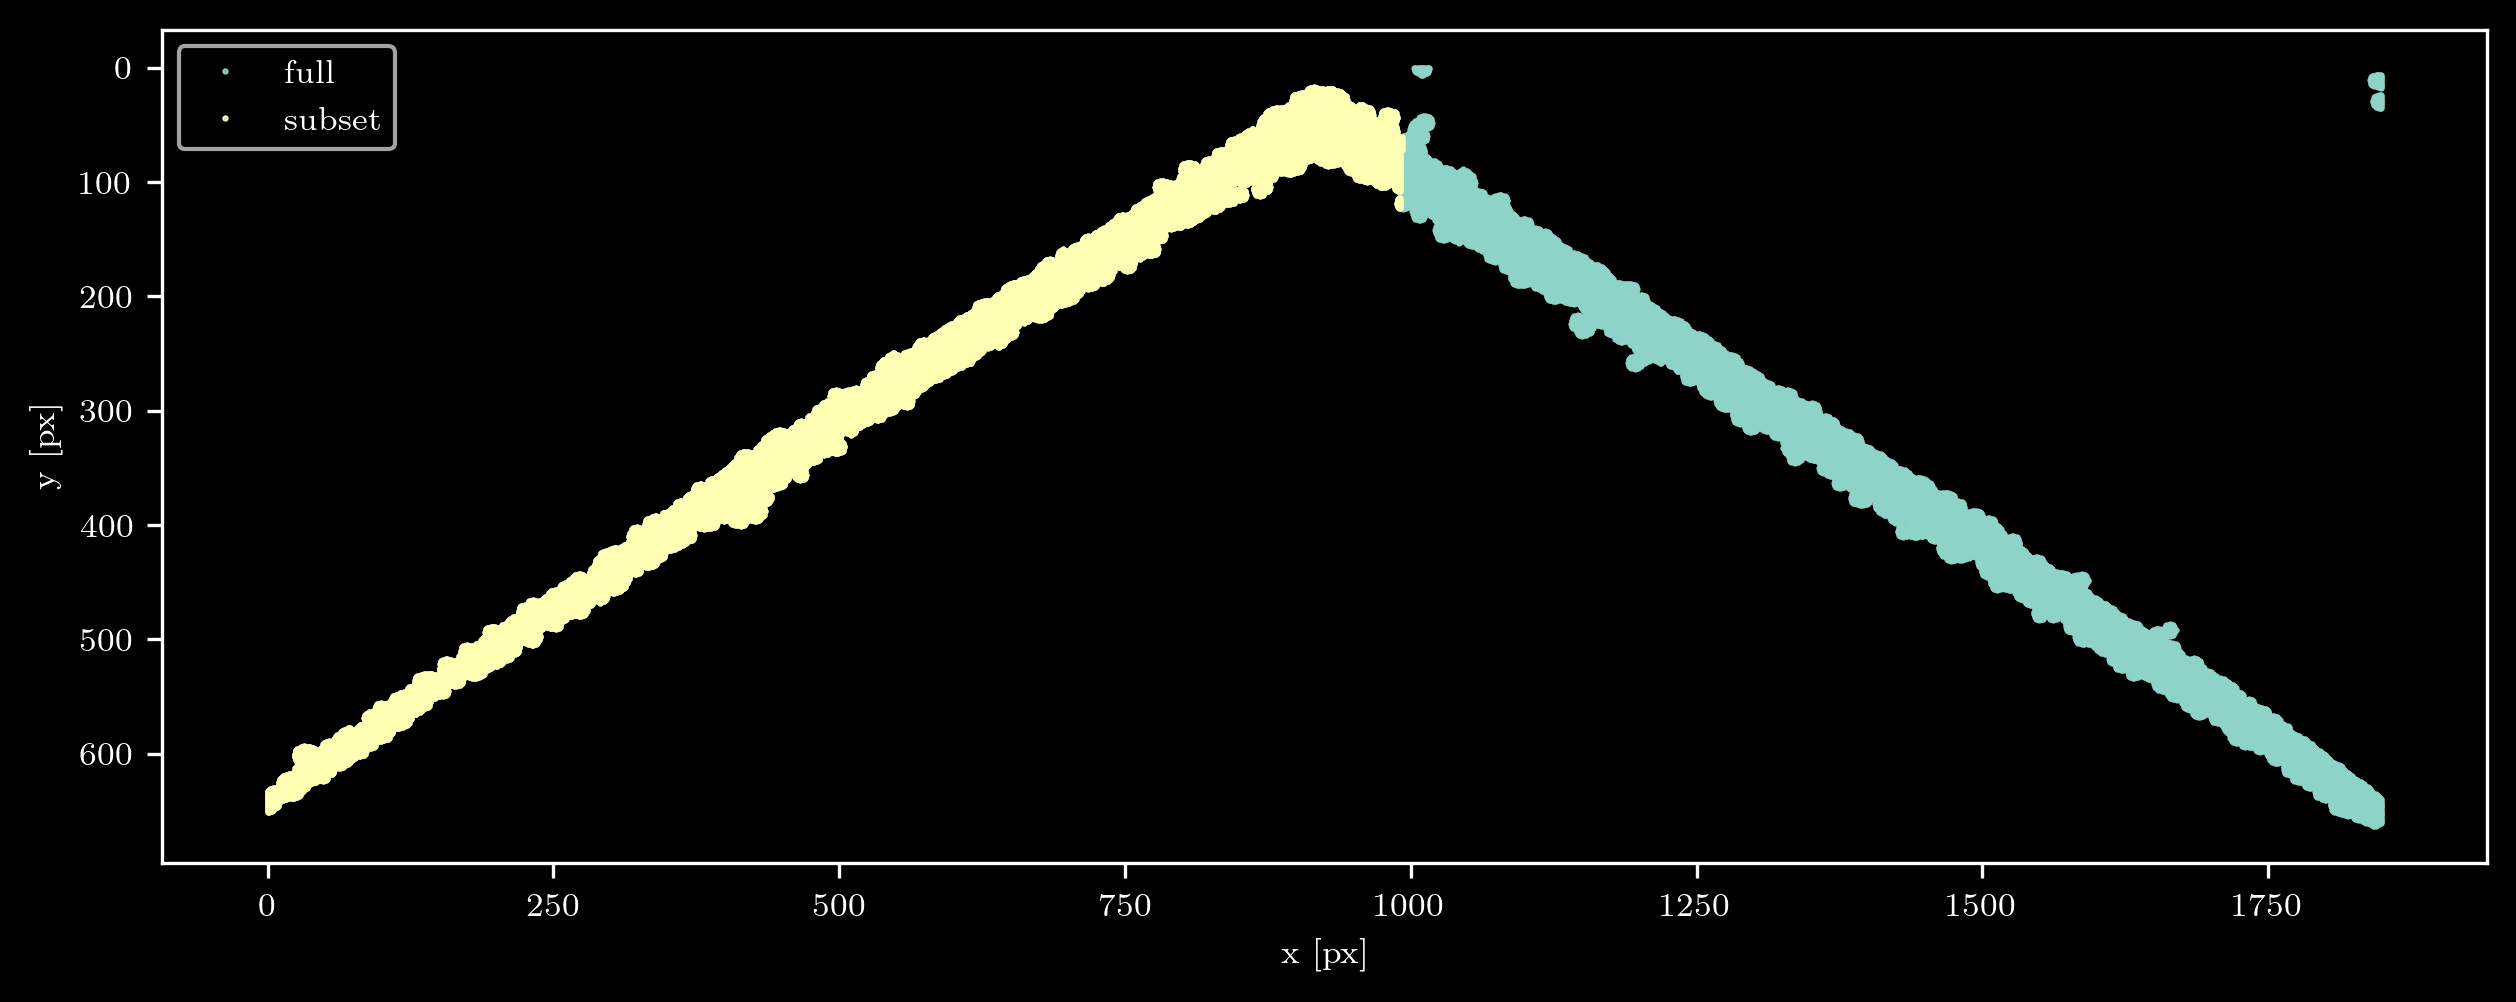

In [26]:
fig = plt.figure(figsize=(10, 4))

ax1 = plt.subplot(111)

ax1.plot(x,y,'o',markersize = .5,label = 'full')
ax1.plot(x[:n//2],y[:n//2],'o',markersize = .5,label = 'subset')
ax1.set_aspect(1)

ax1.set_xlabel('x [px]')
ax1.set_ylabel('y [px]')

ax1.legend()

plt.gca().invert_yaxis()

In [27]:
from scipy.optimize import curve_fit

def f(x, A, B): # this is your 'straight line' y=f(x)
    return A*x + B


xdata = np.asarray(x[:n//2])
ydata = np.asarray(y[:n//2])

popt, pcov = curve_fit(f, xdata,ydata) # your data x, y to fit

popt[0]#slope
# popt[1]#intercept

y_fit = f(xdata,*popt)

popt[0]

-0.6209251693889063

In [28]:
residuals = ydata - f(xdata,*popt)
## residual sum of squares
ss_res = np.sum(residuals**2)
# total sum of squares
ss_tot = np.sum((ydata-np.mean(ydata))**2)
r_squared = 1 - (ss_res / ss_tot)
r_squared 

0.9863951643708647

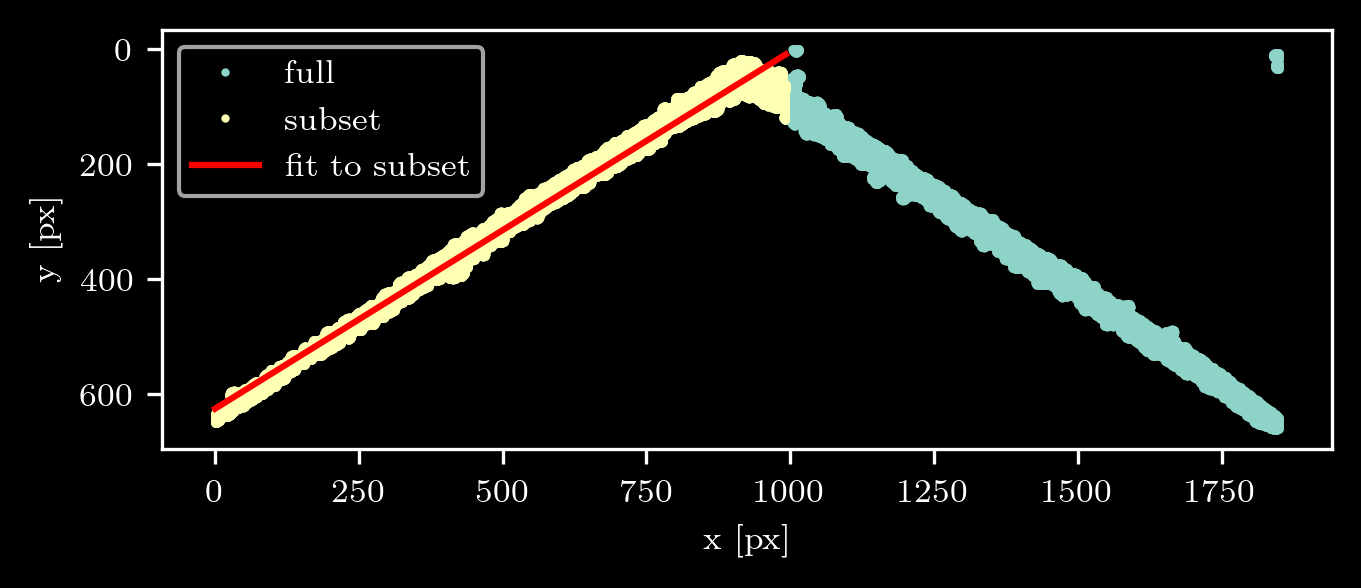

In [38]:
fig = plt.figure(figsize=(6, 2))

ax1 = plt.subplot(111)

ax1.plot(x,y,'o',markersize = 1,label = 'full')
ax1.plot(xdata,ydata,'o',markersize = 1,label = 'subset')
ax1.plot(xdata,y_fit,'r',markersize = 1,label = 'fit to subset')

ax1.legend()

ax1.set_xlabel('x [px]')
ax1.set_ylabel('y [px]')
ax1.set_aspect(1)

plt.gca().invert_yaxis()

plt.tight_layout()

# plt.savefig("/Volumes/Extreme Pro/Projects/Vibrometer/Figures/sandpile_fit" + ".jpg",format="JPG",bbox_inches='tight')

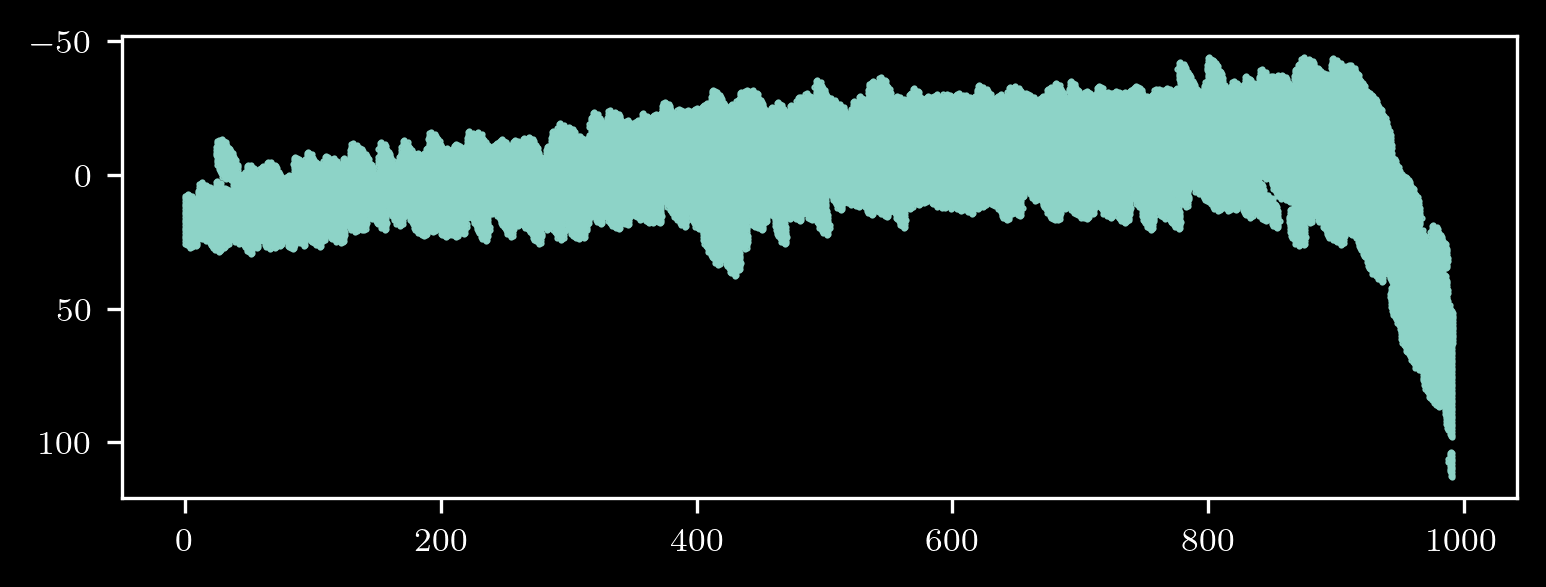

In [20]:
fig = plt.figure(figsize=(6, 2))

ax1 = plt.subplot(111)

ax1.plot(xdata, y[:n//2]-y_fit,'o',markersize = 0.5)
# ax1.set_aspect(1)

plt.gca().invert_yaxis()

In [33]:
slope = np.arctan(abs(popt[0]))
slope = np.rad2deg(slope) 
slope

31.837186689761758

In [34]:
x = np.asarray(x)
y = np.asarray(y)

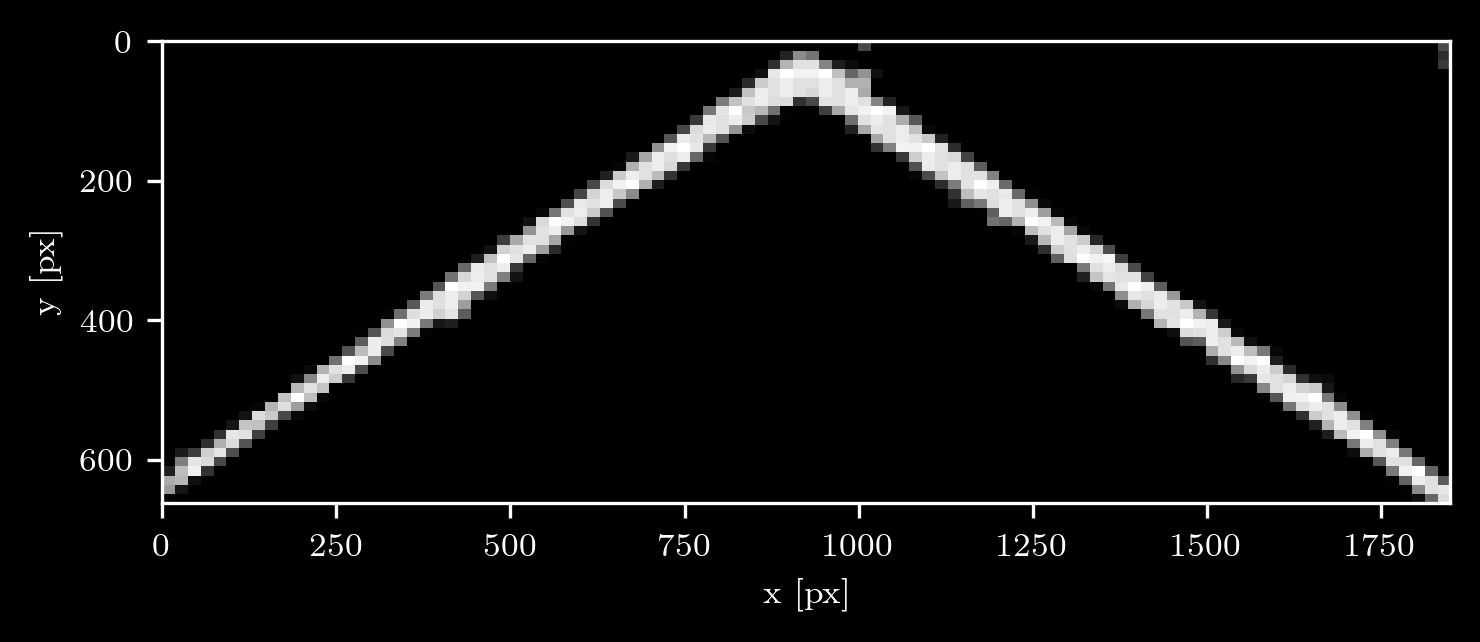

In [35]:
cmap = 'gray'

fig = plt.figure(figsize=(6, 2))

ax1 = plt.subplot(111)

ax1.hist2d(x, y, bins=(100, 50), cmap=cmap);
ax1.set_aspect(1)

ax1.set_xlabel('x [px]')
ax1.set_ylabel('y [px]')

plt.gca().invert_yaxis()

In [26]:
x.shape

(85740,)